In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
env = gym.make('FrozenLake-v0') # we using the frozen lake as our environment
STATES = env.observation_space.n # setting our state
ACTION = env.action_space.n # setting the action
print(STATES)
print(ACTION)

16
4


In [ ]:
learning_rate = 0.75
discount = 0.90
q = np.zeros((STATES,ACTION)) # creating our q table
print(q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# amount of time to run the environment from the beginning
episode = 1500
# amount of steps to take for each environment run
max_steps = 100
rewards = []
epilson = 0.9
print(env.reset())

0


In [ ]:
for ep in range(episode):
  state = env.reset()
  for no in range(max_steps):
    if np.random.uniform(0,1) < epilson:
      action = env.action_space.sample() # creates a random action
    else:
      action = np.argmax(q[state,:])
    next_state, reward, done,info = env.step(action) # robot will take that action
    q[state,action] = q[state,action] + learning_rate *(reward + discount * np.max(q[next_state,:])- q[state,action]) # updating the q values for every action
    state = next_state
    if done:
      rewards.append(reward)
      epilson-=0.001
      break
print(q)

[[6.22564577e-02 2.66863872e-03 2.88433580e-03 2.86021739e-03]
 [3.61377025e-04 5.94208335e-04 2.64794459e-04 7.32336728e-02]
 [5.72999541e-02 1.94123519e-04 1.63893009e-04 2.09945497e-04]
 [2.03784822e-04 6.01387073e-05 1.67892780e-04 1.93636152e-04]
 [9.61619025e-02 3.61974083e-03 1.47704403e-03 1.91080716e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.62193178e-05 8.36791713e-06 1.13096548e-02 5.47845373e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.22291624e-03 6.69794032e-03 8.59728750e-03 3.72327525e-01]
 [2.74460898e-03 2.02704307e-01 9.82037227e-03 4.93571062e-03]
 [3.45951502e-01 2.38259290e-03 5.97651058e-03 4.91778270e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.03917489e-03 2.66929840e-02 2.90954777e-01 3.28681225e-02]
 [1.09597564e-01 8.59546225e-01 9.09945751e-02 1.08553072e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [ ]:
print(len(rewards))

1500


Text(0.5, 0, 'episode (100/)')

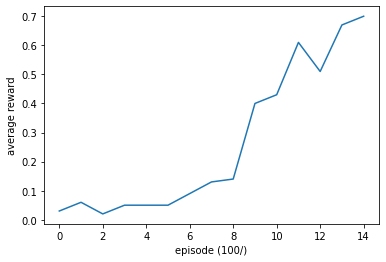

In [ ]:
values=[]
def average_val(value):
  return sum(value)/len(value)


for i in range(0,len(rewards),100):
   values.append(average_val(rewards[i:i+100]))
plt.plot(values)
plt.ylabel('average reward')
plt.xlabel('episode (100/)')

In [ ]:
rewards